In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('/Users/vanshika/Desktop/Brain-Tumor-Classification-DataSet-master'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [9]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('/Users/vanshika/Desktop/Brain-Tumor-Classification-DataSet-master','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/Users/vanshika/Desktop/Brain-Tumor-Classification-DataSet-master','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 655.78it/s]


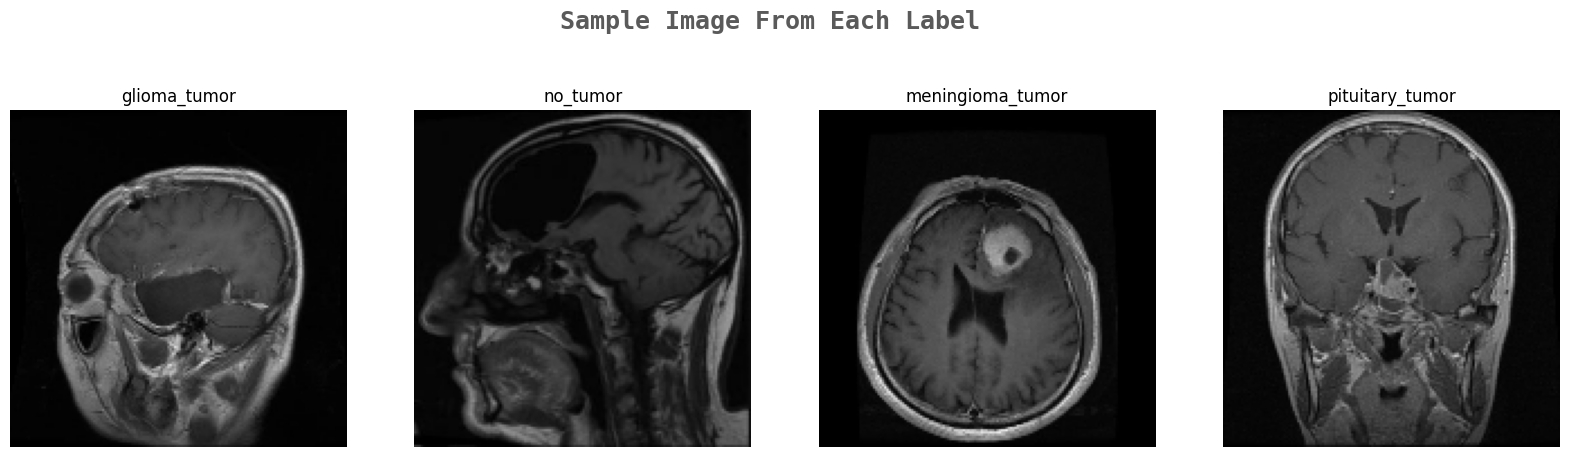

In [10]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [11]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [12]:
X_train.shape

(3264, 150, 150, 3)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [14]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [15]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

In [16]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [17]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [18]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5.keras",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [19]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =8, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/8
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 982ms/step - accuracy: 0.7225 - loss: 0.7015
Epoch 1: val_accuracy improved from -inf to 0.73469, saving model to effnet.h5.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.7236 - loss: 0.6990 - val_accuracy: 0.7347 - val_loss: 0.8008 - learning_rate: 0.0010
Epoch 2/8
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 997ms/step - accuracy: 0.9049 - loss: 0.2712
Epoch 2: val_accuracy improved from 0.73469 to 0.89796, saving model to effnet.h5.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9052 - loss: 0.2705 - val_accuracy: 0.8980 - val_loss: 0.3503 - learning_rate: 0.0010
Epoch 3/8
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9659 - loss: 0.1018
Epoch 3: val_accuracy improved from 0.89796 to 0.92857, saving model to effnet.h5.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.9659 - loss: 0.1017 - val_accuracy: 0.9286 - val_loss: 0.3060 - learning_rate: 0.0010
Epoch 4/8
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9710 - 

In [26]:
from ultralytics import YOLO

model = YOLO("yolo.pt")

In [ ]:

import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


image_path = "/Users/vanshika/Desktop/Brain-Tumor-Classification-DataSet-master/Testing/meningioma_tumor/image.jpg"

prediction_results = model.predict(image_path)

print( prediction_results)
